In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

import xgboost as xgb


In [292]:
corneal = pd.read_csv('C:/Users/Таня/Desktop/просто/наше/Хакатон_сбер/corneal.csv')
corneal

,SMILES,logPerm
0,CC1CC2C3CCC(C3(CC(C2(C4(C1=CC(=O)C=C4)C)F)O)C)...,5.135798
1,CC(C1=CC(=C(C=C1)C2=CC=CC=C2)F)C(=O)O,5.347108
2,CC(C1=CC(=C(C=C1)C2=CC=CC=C2)F)C(=O)N,5.393628
3,C(C(CO)O)O,3.806662
4,CC12CCC(=O)C=C1CCC3C2C(CC4(C3CCC4(C(=O)CO)O)C)O,4.442651
...,...,...
115,C1CN2C(=CC=C2C(=O)C3=CC=CC=C3)C1C(=O)O,1.249902
116,CC1CN(CCC1(C2=CC=CC=C2)C(=O)O)C3CCC(CC3)(C#N)C...,1.406097
117,COC1=CC2=C(C=CN=C2C=C1)C(C3CC4CCN3CC4C=C)O,2.161022
118,C1CN=C(N1)NC2=C(C=CC3=NSN=C32)Cl,3.850998


In [333]:
irritation = pd.read_csv('C:/Users/Таня/Desktop/просто/наше/Хакатон_сбер/irritation.csv')
irritation

,SMILES,Class
0,CC#CC,1
1,CCC=C,1
2,O=CC=O,1
3,CCC=O,1
4,FCC#N,1
...,...,...
5215,CC1OC(CC(O)C1O)OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C...,0
5216,CC1OC(CC(O)C1O)OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C...,0
5217,CN(C(=O)C)c1c(I)c(NC(=O)C)c(I)c(C(=O)NC(C=O)C(...,0
5218,CC(=O)N(CC(O)CO)c1c(I)c(C(=O)NCCO)c(I)c(C(=O)N...,0


In [294]:
melanin = pd.read_csv('C:/Users/Таня/Desktop/просто/наше/Хакатон_сбер/melanin.csv')
melanin

,SMILES,Class
0,CCN(CC)CCNC(=O)c1ccc(cc1)N.Cl,1
1,COCCNC(=O)CN1C2CCC1CC(C2)(c3cccnc3)O,1
2,CC1=NN=C(c2cc3c(cc2C1)OCO3)c4ccc(cc4)N,1
3,CC1C2Cc3ccc(cc3C1(CCN2CC=C)C)O,1
4,COc1ccc(cc1)c2coc3cc(ccc3c2=O)OC,1
...,...,...
775,c1ccc(cc1)c2cc(nc(n2)N)c3[nH]c4c(n3)cccn4,0
776,COc1ccc(cc1S(=O)(=O)N2CCc3c2cc(cc3)C(=O)Nc4nc(...,1
777,Cn1ccnc1c2c(cnc(n2)NCCOC)c3cccc(c3)OC,1
778,Cc1cnc(s1)Nc2c(nccn2)C3CCN(CC3)C,0


In [295]:
import pandas as pd
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors

# Функция для получения молекулярных дескрипторов
def get_molecular_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [None] * len(descriptor_names)  # Возвращаем None для всех дескрипторов, если SMILES некорректен
    descriptors = descriptor_calculator.CalcDescriptors(mol)
    return descriptors

# Предполагаем, что ваш DataFrame уже загружен и называется melanin
# Получаем список доступных дескрипторов
descriptor_names = [desc[0] for desc in Chem.Descriptors._descList]  # Извлекаем только имена дескрипторов
descriptor_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

# Применяем функцию к столбцу SMILES и создаем новый DataFrame с дескрипторами
descriptors_df = melanin['SMILES'].apply(get_molecular_descriptors).apply(pd.Series)

# Переименовываем столбцы дескрипторов
descriptors_df.columns = descriptor_names

# Объединяем оригинальный DataFrame с новыми дескрипторами
result_df = pd.concat([melanin, descriptors_df], axis=1)

# Сохраняем результат в новый CSV файл
result_df.to_csv('melanin_with_descriptors.csv', index=False)

print("Дескрипторы успешно извлечены и сохранены в 'melanin_with_descriptors.csv'.")

Дескрипторы успешно извлечены и сохранены в 'melanin_with_descriptors.csv'.


In [296]:
melanin_with_descriptors = pd.read_csv('C:/Users/Таня/Desktop/просто/наше/Хакатон_сбер/melanin_with_descriptors.csv')
melanin_with_descriptors

,SMILES,Class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CCN(CC)CCNC(=O)c1ccc(cc1)N.Cl,1,11.743677,11.743677,0.000000,-0.044300,0.775469,9.944444,271.792,249.616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,COCCNC(=O)CN1C2CCC1CC(C2)(c3cccnc3)O,1,12.055486,12.055486,0.033118,-0.816349,0.753573,30.347826,319.405,294.205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CC1=NN=C(c2cc3c(cc2C1)OCO3)c4ccc(cc4)N,1,5.773582,5.773582,0.263537,0.263537,0.821909,15.681818,293.326,278.206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CC1C2Cc3ccc(cc3C1(CCN2CC=C)C)O,1,9.798686,9.798686,0.203036,0.203036,0.822957,33.789474,257.377,234.193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,COc1ccc(cc1)c2coc3cc(ccc3c2=O)OC,1,12.550924,12.550924,0.065676,-0.065676,0.737634,10.571429,282.295,268.183,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,c1ccc(cc1)c2cc(nc(n2)N)c3[nH]c4c(n3)cccn4,0,5.848823,5.848823,0.212748,0.212748,0.591158,10.909091,288.314,276.218,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
776,COc1ccc(cc1S(=O)(=O)N2CCc3c2cc(cc3)C(=O)Nc4nc(...,1,13.422588,13.422588,0.061157,-4.000628,0.501304,12.969697,507.977,489.833,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
777,Cn1ccnc1c2c(cnc(n2)NCCOC)c3cccc(c3)OC,1,5.331951,5.331951,0.543237,0.543237,0.667121,10.680000,339.399,318.231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
778,Cc1cnc(s1)Nc2c(nccn2)C3CCN(CC3)C,0,4.563699,4.563699,0.489314,0.489314,0.941343,17.300000,289.408,270.256,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [297]:
melanin_with_descriptors.value_counts('Class')

Class
1    607
0    173
Name: count, dtype: int64

In [298]:
melanin_with_descriptors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Columns: 219 entries, SMILES to fr_urea
dtypes: float64(217), int64(1), object(1)
memory usage: 1.3+ MB


In [299]:
melanin_with_descriptors.describe()

,Class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,...,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.0,780.000000,780.000000,780.000000
mean,0.778205,9.809000,9.809000,0.229353,-0.389998,0.685010,15.386826,320.065708,300.580292,319.630577,...,0.047436,0.028205,0.008974,0.002564,0.003846,0.030769,0.0,0.053846,0.102564,0.021795
std,0.415720,3.357890,3.357890,0.273371,1.146595,0.155854,6.454105,74.803844,70.340602,74.692997,...,0.218658,0.173240,0.094368,0.050604,0.061938,0.172803,0.0,0.231473,0.799386,0.146107
min,0.000000,2.292173,2.292173,0.000000,-5.789034,0.171240,9.125000,151.209000,138.105000,151.099714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.000000,6.044204,6.044204,0.027584,-0.513959,0.592013,11.000000,268.587000,252.188000,268.055101,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,1.000000,11.408947,11.408947,0.122064,-0.131731,0.727738,14.035360,302.228500,284.259000,301.635564,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,1.000000,12.452105,12.452105,0.309632,0.169104,0.796102,17.168421,364.135000,342.165750,363.477987,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1.000000,16.872814,16.872814,1.144213,1.125531,0.945891,54.592593,640.608000,601.296000,639.226677,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.0,2.000000,13.000000,1.000000


In [300]:
melanin_with_descriptors = melanin_with_descriptors.drop('SMILES', axis=1)

In [301]:
melanin_with_descriptors.columns

Index(['Class', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex',
       'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       ...
       'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene',
       'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene',
       'fr_unbrch_alkane', 'fr_urea'],
      dtype='object', length=218)

In [302]:


# Вычисляем третий квартиль для каждого столбца
q3 = melanin_with_descriptors.quantile(0.75)

# Отбираем только те столбцы, где Q3 > 0
filtered_melanin_with_descriptors = melanin_with_descriptors.loc[:, q3 > 0]

filtered_melanin_with_descriptors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Columns: 129 entries, Class to fr_para_hydroxylation
dtypes: float64(128), int64(1)
memory usage: 786.2 KB


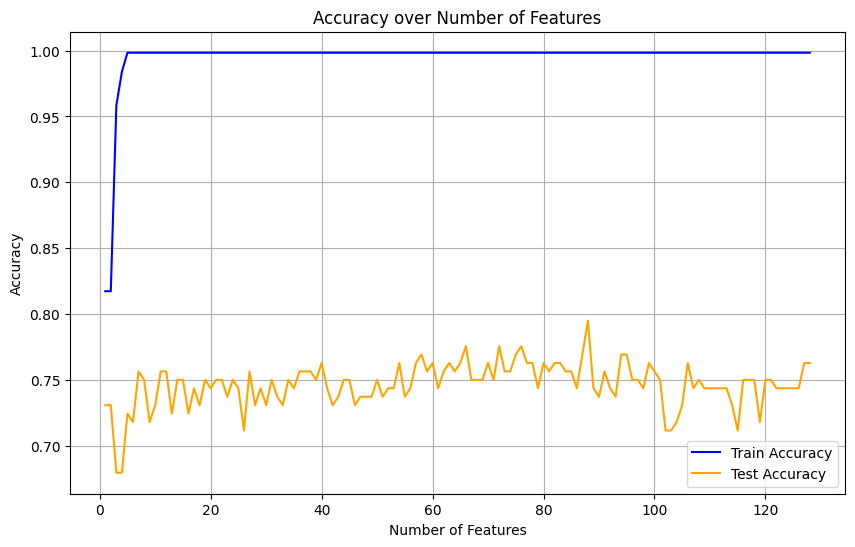

Максимальная тестовая точность: 0.7949 достигнута при использовании 88 признаков.
Тестовая точность на отфильтрованных признаках: 0.7949
Важность признаков:
                Feature  Importance
24              BertzCT    0.104999
35                Chi4n    0.072882
74         EState_VSA10    0.039694
38               Kappa1    0.036826
52            PEOE_VSA8    0.032352
..                  ...         ...
1        MaxEStateIndex    0.000000
73          EState_VSA1    0.000000
12  MinAbsPartialCharge    0.000000
8            ExactMolWt    0.000000
68           SlogP_VSA4    0.000000

[88 rows x 2 columns]


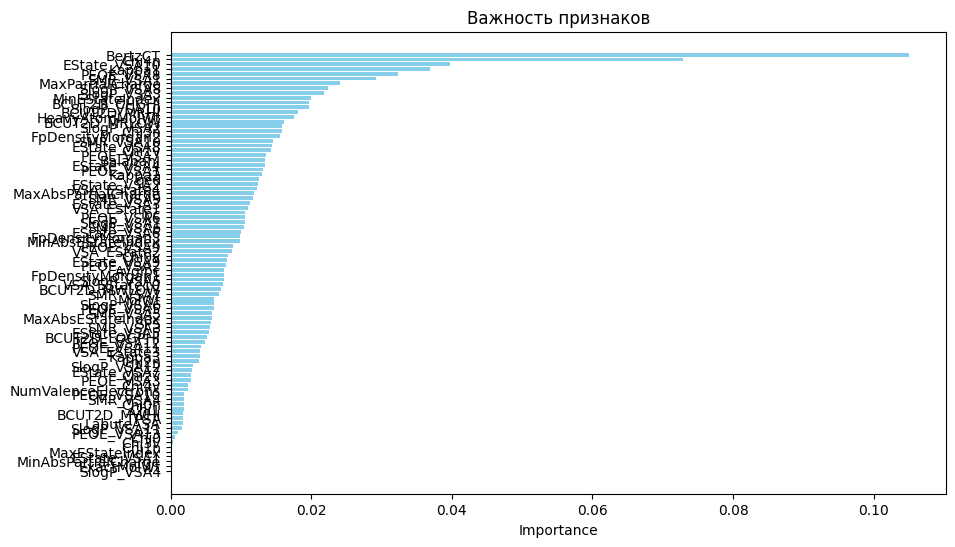

In [303]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Предполагается, что filtered_melanin_with_descriptors уже определен
X = filtered_melanin_with_descriptors.drop('Class', axis=1)
y = filtered_melanin_with_descriptors['Class']

# Оставляем только числовые признаки
X = X.select_dtypes(include=[np.number])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация модели XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Словарь для хранения метрик
train_accuracies = []
test_accuracies = []

# Обучение модели с отслеживанием метрик
for i in range(1, X_train.shape[1] + 1):
    # Обучаем модель на первых i признаках
    xgb_model.fit(X_train.iloc[:, :i], y_train)
    
    # Предсказания на обучающей и тестовой выборках
    y_train_pred = xgb_model.predict(X_train.iloc[:, :i])
    y_test_pred = xgb_model.predict(X_test.iloc[:, :i])
    
    # Вычисление точности
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Построение графика обучения
plt.figure(figsize=(10, 6))
plt.plot(range(1, X_train.shape[1] + 1), train_accuracies, label='Train Accuracy', color='blue')
plt.plot(range(1, X_train.shape[1] + 1), test_accuracies, label='Test Accuracy', color='orange')
plt.title('Accuracy over Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Найти количество признаков, при котором тестовая точность максимальна
max_test_accuracy = max(test_accuracies)
optimal_num_features = test_accuracies.index(max_test_accuracy) + 1  # +1, так как индексация начинается с 0

print(f"Максимальная тестовая точность: {max_test_accuracy:.4f} достигнута при использовании {optimal_num_features} признаков.")

# Создаем новый набор данных с отфильтрованными признаками
num_features_to_keep = 88
if optimal_num_features > num_features_to_keep:
    optimal_num_features = num_features_to_keep

filtered_melanin_with_descriptors = filtered_melanin_with_descriptors.iloc[:, :optimal_num_features + 1]  # +1 для 'Class'

# Разделение данных на обучающую и тестовую выборки с отфильтрованными признаками
X = filtered_melanin_with_descriptors.drop('Class', axis=1)
y = filtered_melanin_with_descriptors['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели на отфильтрованных признаках
xgb_model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_test_pred_filtered = xgb_model.predict(X_test)

# Вычисление точности на тестовой выборке
test_accuracy_filtered = accuracy_score(y_test, y_test_pred_filtered)
print(f"Тестовая точность на отфильтрованных признаках: {test_accuracy_filtered:.4f}")

# Важность признаков
importance = xgb_model.feature_importances_

# Убедитесь, что длины совпадают
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Важность признаков:")
print(importance_df)

# Построение графика важности признаков
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Важность признаков')
plt.gca().invert_yaxis()
plt.show()

Пробуем обучить случайный лес, но точность не особо кайф, поэтому откидываем

In [304]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Разделение данных на признаки и метки классов
X = filtered_melanin_with_descriptors.drop('Class', axis=1)
y = filtered_melanin_with_descriptors['Class']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели случайного леса
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 деревьев
model.fit(X_train, y_train)

# Сделать предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred))
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))
print("Точность:", accuracy_score(y_test, y_pred))

Матрица ошибок:
[[  5  35]
 [  8 108]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.38      0.12      0.19        40
           1       0.76      0.93      0.83       116

    accuracy                           0.72       156
   macro avg       0.57      0.53      0.51       156
weighted avg       0.66      0.72      0.67       156

Точность: 0.7243589743589743


irritation - раздражение

In [334]:
import pandas as pd
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors

# Функция для получения молекулярных дескрипторов
def get_molecular_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [None] * len(descriptor_names)  # Возвращаем None для всех дескрипторов, если SMILES некорректен
    descriptors = descriptor_calculator.CalcDescriptors(mol)
    return descriptors

# Предполагаем, что ваш DataFrame уже загружен и называется melanin
# Получаем список доступных дескрипторов
descriptor_names = [desc[0] for desc in Chem.Descriptors._descList]  # Извлекаем только имена дескрипторов
descriptor_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

# Применяем функцию к столбцу SMILES и создаем новый DataFrame с дескрипторами
descriptors_df = irritation['SMILES'].apply(get_molecular_descriptors).apply(pd.Series)

# Переименовываем столбцы дескрипторов
descriptors_df.columns = descriptor_names

# Объединяем оригинальный DataFrame с новыми дескрипторами
result_df = pd.concat([irritation, descriptors_df], axis=1)

# Сохраняем результат в новый CSV файл
result_df.to_csv('irritation_with_descriptors.csv', index=False)

print("Дескрипторы успешно извлечены и сохранены в 'irritation_with_descriptors.csv'.")

Дескрипторы успешно извлечены и сохранены в 'irritation_with_descriptors.csv'.


In [335]:
irritation_with_descriptors = pd.read_csv('C:/Users/Таня/Desktop/просто/наше/ProstoSPB-Hackathon/notebooks/irritation_with_descriptors.csv')
irritation_with_descriptors

,SMILES,Class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC#CC,1,2.680556,2.680556,1.819444,1.819444,0.362198,3.500000,54.092,48.044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CCC=C,1,3.479167,3.479167,1.083333,1.083333,0.399987,6.250000,56.108,48.044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,O=CC=O,1,8.805556,8.805556,0.194444,0.194444,0.297340,5.000000,58.036,56.020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CCC=O,1,9.173611,9.173611,0.638889,0.638889,0.403260,6.250000,58.080,52.032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FCC#N,1,10.361111,10.361111,0.875000,-0.875000,0.397829,5.000000,59.043,57.027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,CC1OC(CC(O)C1O)OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C...,0,12.568397,12.568397,0.020300,-1.012485,0.162215,55.545455,780.949,716.437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5216,CC1OC(CC(O)C1O)OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C...,0,12.568397,12.568397,0.045206,-1.012485,0.162215,55.545455,780.949,716.437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5217,CN(C(=O)C)c1c(I)c(NC(=O)C)c(I)c(C(=O)NC(C=O)C(...,0,13.113247,13.113247,0.022882,-1.910232,0.147617,14.687500,789.099,766.923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5218,CC(=O)N(CC(O)CO)c1c(I)c(C(=O)NCCO)c(I)c(C(=O)N...,0,12.949494,12.949494,0.031563,-1.256091,0.139865,12.781250,791.115,766.923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [336]:
irritation_with_descriptors.value_counts('Class')

Class
1    3874
0    1346
Name: count, dtype: int64

In [337]:
irritation_with_descriptors = irritation_with_descriptors.drop('SMILES', axis=1)

In [338]:
# Вычисляем третий квартиль для каждого столбца
q3 = irritation_with_descriptors.quantile(0.75)

# Отбираем только те столбцы, где Q3 > 0
filtered_irritation_with_descriptors = irritation_with_descriptors.loc[:, q3 > 0]

filtered_irritation_with_descriptors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5220 entries, 0 to 5219
Columns: 109 entries, Class to fr_halogen
dtypes: float64(108), int64(1)
memory usage: 4.3 MB


In [339]:
filtered_irritation_with_descriptors.describe()

C:\Users\Таня\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\Таня\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,Phi,RingCount,MolLogP,MolMR,fr_C_O,fr_C_O_noCOO,fr_NH0,fr_benzene,fr_ether,fr_halogen
count,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,...,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000
mean,0.742146,9.302957,9.302957,0.383379,-0.550844,0.559762,14.012180,222.879958,209.578027,222.542693,...,3.750722,1.499808,2.140123,58.022633,0.666475,0.468391,0.637165,0.813218,0.394444,0.605172
std,0.437495,3.127405,3.127405,0.444394,1.435750,0.157888,8.573797,114.990783,108.634870,114.859904,...,2.962735,1.298001,1.764265,30.270236,0.903288,0.783987,1.006854,0.797208,0.859205,1.487333
min,0.000000,1.500000,1.500000,0.000000,-9.810281,0.043742,3.500000,54.092000,48.044000,54.046950,...,0.346251,0.000000,-8.861700,10.653600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.279478,6.279478,0.087288,-0.972107,0.458675,9.500000,144.177000,135.533000,144.068748,...,1.956484,1.000000,1.144950,37.811400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,10.312226,10.312226,0.233160,-0.345058,0.562464,10.500000,186.793000,177.988000,186.078644,...,2.784849,1.000000,1.989250,47.141900,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,11.520418,11.520418,0.578426,0.367405,0.669075,14.666667,272.747000,256.223000,272.136850,...,4.588920,2.000000,3.022425,71.955050,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,17.442653,17.442653,7.484515,2.000000,0.940384,64.384615,794.976000,766.923000,794.445257,...,38.214000,10.000000,13.235300,214.077500,8.000000,6.000000,8.000000,6.000000,9.000000,27.000000


In [340]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

In [341]:
filtered_irritation_with_descriptors


,Class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,Phi,RingCount,MolLogP,MolMR,fr_C_O,fr_C_O_noCOO,fr_NH0,fr_benzene,fr_ether,fr_halogen
0,1,2.680556,2.680556,1.819444,1.819444,0.362198,3.500000,54.092,48.044,54.046950,...,2.278400,0.0,1.02960,19.1240,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3.479167,3.479167,1.083333,1.083333,0.399987,6.250000,56.108,48.044,56.062600,...,2.561900,0.0,1.58240,20.4880,0.0,0.0,0.0,0.0,0.0,0.0
2,1,8.805556,8.805556,0.194444,0.194444,0.297340,5.000000,58.036,56.020,58.005479,...,1.953900,0.0,-0.61580,12.1280,2.0,2.0,0.0,0.0,0.0,0.0
3,1,9.173611,9.173611,0.638889,0.638889,0.403260,6.250000,58.080,52.032,58.041865,...,2.449725,0.0,0.59530,16.3550,1.0,1.0,0.0,0.0,0.0,0.0
4,1,10.361111,10.361111,0.875000,-0.875000,0.397829,5.000000,59.043,57.027,59.017127,...,2.069100,0.0,0.47948,11.5880,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,0,12.568397,12.568397,0.020300,-1.012485,0.162215,55.545455,780.949,716.437,780.429607,...,11.106660,8.0,2.21810,192.6108,1.0,1.0,0.0,0.0,7.0,0.0
5216,0,12.568397,12.568397,0.045206,-1.012485,0.162215,55.545455,780.949,716.437,780.429607,...,11.106660,8.0,2.21810,192.6108,1.0,1.0,0.0,0.0,7.0,0.0
5217,0,13.113247,13.113247,0.022882,-1.910232,0.147617,14.687500,789.099,766.923,788.854109,...,11.650902,1.0,-0.18620,140.4051,4.0,4.0,1.0,1.0,0.0,3.0
5218,0,12.949494,12.949494,0.031563,-1.256091,0.139865,12.781250,791.115,766.923,790.869759,...,13.082854,1.0,-0.98840,140.5574,3.0,3.0,1.0,1.0,0.0,3.0


In [342]:
clean_dataset(filtered_irritation_with_descriptors)

C:\Users\Таня\AppData\Local\Temp\ipykernel_4688\3521111987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,Class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,Phi,RingCount,MolLogP,MolMR,fr_C_O,fr_C_O_noCOO,fr_NH0,fr_benzene,fr_ether,fr_halogen
0,1.0,2.680556,2.680556,1.819444,1.819444,0.362198,3.500000,54.092,48.044,54.046950,...,2.278400,0.0,1.02960,19.1240,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,3.479167,3.479167,1.083333,1.083333,0.399987,6.250000,56.108,48.044,56.062600,...,2.561900,0.0,1.58240,20.4880,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,8.805556,8.805556,0.194444,0.194444,0.297340,5.000000,58.036,56.020,58.005479,...,1.953900,0.0,-0.61580,12.1280,2.0,2.0,0.0,0.0,0.0,0.0
3,1.0,9.173611,9.173611,0.638889,0.638889,0.403260,6.250000,58.080,52.032,58.041865,...,2.449725,0.0,0.59530,16.3550,1.0,1.0,0.0,0.0,0.0,0.0
4,1.0,10.361111,10.361111,0.875000,-0.875000,0.397829,5.000000,59.043,57.027,59.017127,...,2.069100,0.0,0.47948,11.5880,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,0.0,12.568397,12.568397,0.020300,-1.012485,0.162215,55.545455,780.949,716.437,780.429607,...,11.106660,8.0,2.21810,192.6108,1.0,1.0,0.0,0.0,7.0,0.0
5216,0.0,12.568397,12.568397,0.045206,-1.012485,0.162215,55.545455,780.949,716.437,780.429607,...,11.106660,8.0,2.21810,192.6108,1.0,1.0,0.0,0.0,7.0,0.0
5217,0.0,13.113247,13.113247,0.022882,-1.910232,0.147617,14.687500,789.099,766.923,788.854109,...,11.650902,1.0,-0.18620,140.4051,4.0,4.0,1.0,1.0,0.0,3.0
5218,0.0,12.949494,12.949494,0.031563,-1.256091,0.139865,12.781250,791.115,766.923,790.869759,...,13.082854,1.0,-0.98840,140.5574,3.0,3.0,1.0,1.0,0.0,3.0


In [343]:
print(filtered_irritation_with_descriptors.dtypes)

Class                  int64
MaxAbsEStateIndex    float64
MaxEStateIndex       float64
MinAbsEStateIndex    float64
MinEStateIndex       float64
                      ...   
fr_C_O_noCOO         float64
fr_NH0               float64
fr_benzene           float64
fr_ether             float64
fr_halogen           float64
Length: 109, dtype: object


In [346]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


X = filtered_irritation_with_descriptors.drop(columns=['Class'])
y = filtered_irritation_with_descriptors['Class']

# 2. Создание экземпляра StandardScaler
scaler = StandardScaler()

# 3. Обучение скалера на признаках
X_scaled = scaler.fit_transform(X)

# 4. Преобразование отскалированных данных обратно в DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 5. Добавление столбца Class обратно
filtered_irritation_with_descriptors_scaled = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

# Проверка результата
print(filtered_irritation_with_descriptors_scaled)

      MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0             -2.119757       -2.119757           3.241262        1.650121   
1             -1.864277       -1.864277           1.581000        1.136857   
2             -0.160340       -0.160340          -0.423844        0.517067   
3             -0.042597       -0.042597           0.578578        0.826962   
4              0.337290        0.337290           1.111115       -0.228619   
...                 ...             ...                ...             ...   
5204           1.043412        1.043412          -0.816618       -0.324482   
5205           1.043412        1.043412          -0.760443       -0.324482   
5206           1.217712        1.217712          -0.810795       -0.950449   
5207           1.165327        1.165327          -0.791215       -0.494340   
5208           1.046848        1.046848          -0.775313       -0.322095   

           qed       SPS     MolWt  HeavyAtomMolWt  ExactMolWt 

In [347]:
filtered_irritation_with_descriptors

,Class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,Phi,RingCount,MolLogP,MolMR,fr_C_O,fr_C_O_noCOO,fr_NH0,fr_benzene,fr_ether,fr_halogen
0,1,2.680556,2.680556,1.819444,1.819444,0.362198,3.500000,54.092,48.044,54.046950,...,2.278400,0.0,1.02960,19.1240,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3.479167,3.479167,1.083333,1.083333,0.399987,6.250000,56.108,48.044,56.062600,...,2.561900,0.0,1.58240,20.4880,0.0,0.0,0.0,0.0,0.0,0.0
2,1,8.805556,8.805556,0.194444,0.194444,0.297340,5.000000,58.036,56.020,58.005479,...,1.953900,0.0,-0.61580,12.1280,2.0,2.0,0.0,0.0,0.0,0.0
3,1,9.173611,9.173611,0.638889,0.638889,0.403260,6.250000,58.080,52.032,58.041865,...,2.449725,0.0,0.59530,16.3550,1.0,1.0,0.0,0.0,0.0,0.0
4,1,10.361111,10.361111,0.875000,-0.875000,0.397829,5.000000,59.043,57.027,59.017127,...,2.069100,0.0,0.47948,11.5880,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,0,12.568397,12.568397,0.020300,-1.012485,0.162215,55.545455,780.949,716.437,780.429607,...,11.106660,8.0,2.21810,192.6108,1.0,1.0,0.0,0.0,7.0,0.0
5216,0,12.568397,12.568397,0.045206,-1.012485,0.162215,55.545455,780.949,716.437,780.429607,...,11.106660,8.0,2.21810,192.6108,1.0,1.0,0.0,0.0,7.0,0.0
5217,0,13.113247,13.113247,0.022882,-1.910232,0.147617,14.687500,789.099,766.923,788.854109,...,11.650902,1.0,-0.18620,140.4051,4.0,4.0,1.0,1.0,0.0,3.0
5218,0,12.949494,12.949494,0.031563,-1.256091,0.139865,12.781250,791.115,766.923,790.869759,...,13.082854,1.0,-0.98840,140.5574,3.0,3.0,1.0,1.0,0.0,3.0


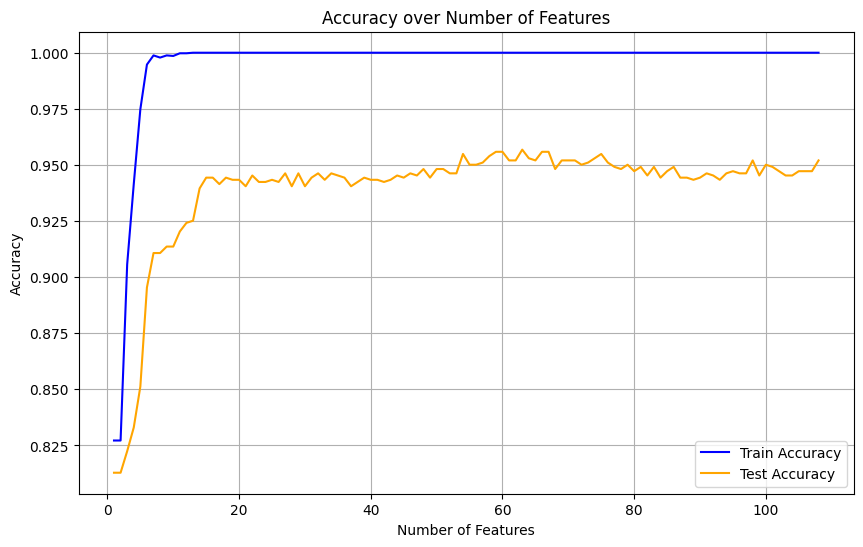

Максимальная тестовая точность: 0.9568 достигнута при использовании 63 признаков.
Тестовая точность на отфильтрованных признаках: 0.9568
Важность признаков:
                Feature  Importance
9   NumValenceElectrons    0.797982
15     FpDensityMorgan3    0.022198
41            LabuteASA    0.019700
37                  Ipc    0.012848
53             SMR_VSA3    0.012692
..                  ...         ...
51             SMR_VSA1    0.000842
35                Chi4n    0.000744
31                Chi2n    0.000743
30                Chi1v    0.000592
1        MaxEStateIndex    0.000000

[63 rows x 2 columns]


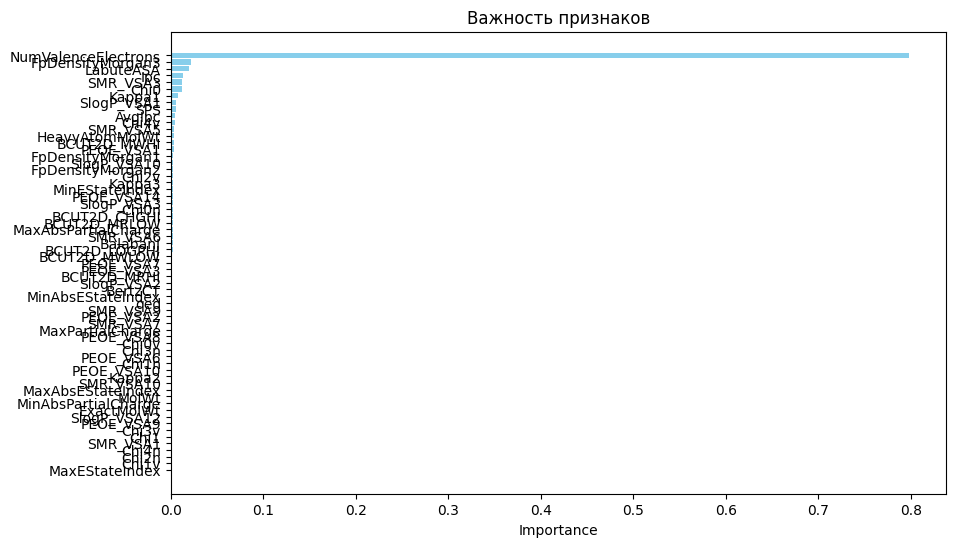

In [348]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Предполагается, что filtered_melanin_with_descriptors уже определен
X = filtered_irritation_with_descriptors.drop('Class', axis=1)
y = filtered_irritation_with_descriptors['Class']

# Оставляем только числовые признаки
X = X.select_dtypes(include=[np.number])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Инициализация модели XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Словарь для хранения метрик
train_accuracies = []
test_accuracies = []

# Обучение модели с отслеживанием метрик
for i in range(1, X_train.shape[1] + 1):
    # Обучаем модель на первых i признаках
    xgb_model.fit(X_train.iloc[:, :i], y_train)
    
    # Предсказания на обучающей и тестовой выборках
    y_train_pred = xgb_model.predict(X_train.iloc[:, :i])
    y_test_pred = xgb_model.predict(X_test.iloc[:, :i])
    
    # Вычисление точности
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Построение графика обучения
plt.figure(figsize=(10, 6))
plt.plot(range(1, X_train.shape[1] + 1), train_accuracies, label='Train Accuracy', color='blue')
plt.plot(range(1, X_train.shape[1] + 1), test_accuracies, label='Test Accuracy', color='orange')
plt.title('Accuracy over Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Найти количество признаков, при котором тестовая точность максимальна
max_test_accuracy = max(test_accuracies)
optimal_num_features = test_accuracies.index(max_test_accuracy) + 1  # +1, так как индексация начинается с 0

print(f"Максимальная тестовая точность: {max_test_accuracy:.4f} достигнута при использовании {optimal_num_features} признаков.")

# Создаем новый набор данных с отфильтрованными признаками
num_features_to_keep = 88
if optimal_num_features > num_features_to_keep:
    optimal_num_features = num_features_to_keep

filtered_irritation_with_descriptors = filtered_irritation_with_descriptors.iloc[:, :optimal_num_features + 1]  # +1 для 'Class'

# Разделение данных на обучающую и тестовую выборки с отфильтрованными признаками
X = filtered_irritation_with_descriptors.drop('Class', axis=1)
y = filtered_irritation_with_descriptors['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели на отфильтрованных признаках
xgb_model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_test_pred_filtered = xgb_model.predict(X_test)

# Вычисление точности на тестовой выборке
test_accuracy_filtered = accuracy_score(y_test, y_test_pred_filtered)
print(f"Тестовая точность на отфильтрованных признаках: {test_accuracy_filtered:.4f}")

# Важность признаков
importance = xgb_model.feature_importances_

# Убедитесь, что длины совпадают
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Важность признаков:")
print(importance_df)

# Построение графика важности признаков
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Важность признаков')
plt.gca().invert_yaxis()
plt.show()

In [166]:
filtered_irritation_with_descriptors = filtered_irritation_with_descriptors[filtered_irritation_with_descriptors.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

In [168]:
filtered_irritation_with_descriptors

,Class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,Phi,RingCount,MolLogP,MolMR,fr_C_O,fr_C_O_noCOO,fr_NH0,fr_benzene,fr_ether,fr_halogen
2670,1,6.280093,6.280093,1.272377,-1.652778,0.606386,12.000000,195.249,180.129,196.007406,...,4.176155,0.0,3.2304,43.0500,0.0,0.0,0.0,0.0,0.0,1.0
2680,1,10.087087,10.087087,0.548681,-0.889583,0.619832,13.111111,196.108,185.020,196.995500,...,4.766538,0.0,-0.0410,36.6532,1.0,0.0,0.0,0.0,0.0,0.0
2756,1,5.740093,5.740093,1.707778,-1.707778,0.523814,12.000000,199.269,190.197,199.941473,...,2.061575,0.0,2.0601,29.1990,0.0,0.0,0.0,0.0,0.0,1.0
3074,1,5.505525,5.505525,1.928364,-2.235556,0.548134,12.000000,219.687,213.639,219.886850,...,2.416409,0.0,2.1658,29.1880,0.0,0.0,0.0,0.0,0.0,2.0
3409,1,6.481103,6.481103,0.290610,-2.595486,0.687645,22.307692,252.040,241.960,250.959915,...,2.756043,2.0,4.2769,55.7660,0.0,0.0,0.0,0.0,0.0,2.0
3612,1,2.333750,2.333750,0.839261,-0.839261,0.530724,11.076923,290.059,262.843,291.113471,...,11.545091,0.0,4.8815,64.8990,0.0,0.0,0.0,0.0,0.0,0.0
3699,1,6.885602,6.885602,1.323056,-2.091286,0.486069,12.000000,325.512,298.296,326.082323,...,10.049534,0.0,5.5710,70.7520,0.0,0.0,0.0,0.0,0.0,1.0
3718,1,11.061274,11.061274,0.096087,-3.202216,0.587436,9.333333,339.359,329.279,341.885008,...,7.388864,0.0,-0.2102,48.0856,2.0,0.0,0.0,0.0,0.0,0.0
3747,1,11.206137,11.206137,0.310874,-3.487431,0.630793,11.058824,351.031,326.839,352.069654,...,8.640184,0.0,3.1550,68.7160,2.0,2.0,0.0,0.0,0.0,0.0
3791,1,4.074532,4.074532,1.076111,-2.990592,0.462613,11.090909,391.102,370.942,392.058695,...,4.788125,3.0,3.3428,98.9860,0.0,0.0,0.0,3.0,0.0,0.0


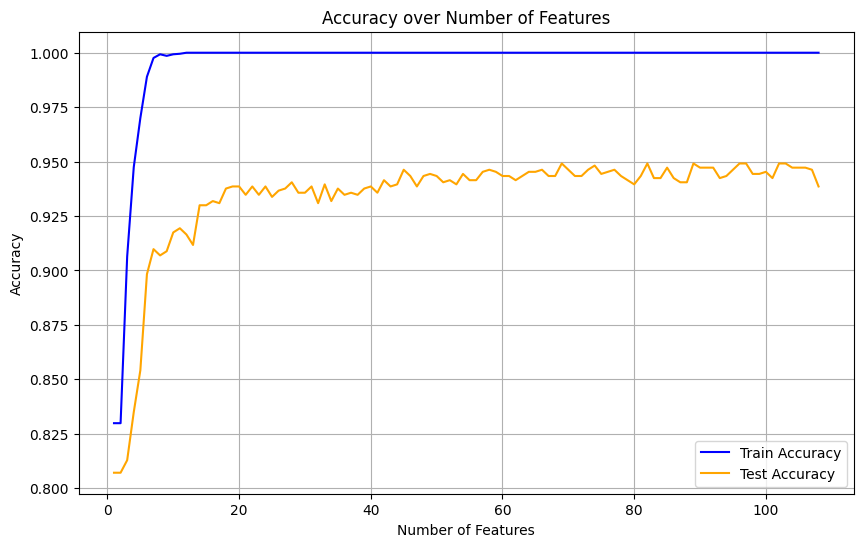

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Предполагается, что filtered_melanin_with_descriptors уже определен
X = filtered_irritation_with_descriptors.drop('Class', axis=1)
y = filtered_irritation_with_descriptors['Class']

# Оставляем только числовые признаки
X = X.select_dtypes(include=[np.number])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





# Инициализация модели XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Словарь для хранения метрик
train_accuracies = []
test_accuracies = []

# Обучение модели с отслеживанием метрик
for i in range(1, X_train.shape[1] + 1):
    # Обучаем модель на первых i признаках
    xgb_model.fit(X_train.iloc[:, :i], y_train)
    
    # Предсказания на обучающей и тестовой выборках
    y_train_pred = xgb_model.predict(X_train.iloc[:, :i])
    y_test_pred = xgb_model.predict(X_test.iloc[:, :i])
    
    # Вычисление точности
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Построение графика обучения
plt.figure(figsize=(10, 6))
plt.plot(range(1, X_train.shape[1] + 1), train_accuracies, label='Train Accuracy', color='blue')
plt.plot(range(1, X_train.shape[1] + 1), test_accuracies, label='Test Accuracy', color='orange')
plt.title('Accuracy over Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()



In [ ]:
# Найти количество признаков, при котором тестовая точность максимальна
max_test_accuracy = max(test_accuracies)
optimal_num_features = test_accuracies.index(max_test_accuracy) + 1  # +1, так как индексация начинается с 0

print(f"Максимальная тестовая точность: {max_test_accuracy:.4f} достигнута при использовании {optimal_num_features} признаков.")

# Создаем новый набор данных с отфильтрованными признаками
num_features_to_keep = 88
if optimal_num_features > num_features_to_keep:
    optimal_num_features = num_features_to_keep

filtered_irritation_with_descriptors = filtered_irritation_with_descriptors.iloc[:, :optimal_num_features + 1]  # +1 для 'Class'

In [ ]:
# Разделение данных на обучающую и тестовую выборки с отфильтрованными признаками
X = filtered_irritation_with_descriptors.drop('Class', axis=1)
y = filtered_irritation_with_descriptors['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели на отфильтрованных признаках
xgb_model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_test_pred_filtered = xgb_model.predict(X_test)

# Вычисление точности на тестовой выборке
test_accuracy_filtered = accuracy_score(y_test, y_test_pred_filtered)
print(f"Тестовая точность на отфильтрованных признаках: {test_accuracy_filtered:.4f}")

# Важность признаков
importance = xgb_model.feature_importances_

# Убедитесь, что длины совпадают
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Важность признаков:")
print(importance_df)

# Построение графика важности признаков
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Важность признаков')
plt.gca().invert_yaxis()
plt.show()